# draft

In [114]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt


## 판다스: melt, stack

### melt

`-` 설명: 

`-` 데이터

In [160]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


`-` 사용예시1: 기본사용

In [162]:
df.melt()

,variable,value
0,Date,2019-10
1,Date,2019-11
2,Date,2019-12
3,Date,2020-01
4,Date,2020-02
...,...,...
216,Asus,16
217,Asus,12
218,Asus,20
219,Asus,15


- tidydata 아님

`-` 사용예시2: id_vars --> tidy data 

In [165]:
df.melt(id_vars='Date')

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


- tidydata

`-` 사용예시3: 

In [170]:
df.set_index('Date').melt()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


- tidydata, 그런데 Date에 대한 정보는 손상되었음 

`-` 사용예시4: ignore_index=False

In [174]:
df.set_index('Date').melt(ignore_index=False).reset_index()

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


- tidydata 

### stack

`-` 설명: 

In [149]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

`-` 사용예시1

In [155]:
df.stack()

CANCELLED     DIVERTED
AIRLINE WEEKDAY                                
AA      1       mean      0.032106     0.004699
                count  1277.000000  1277.000000
        2       mean      0.007341     0.001631
                count  1226.000000  1226.000000
        3       mean      0.011949     0.001494
...                            ...          ...
WN      5       count  1201.000000  1201.000000
        6       mean      0.010132     0.003040
                count   987.000000   987.000000
        7       mean      0.006066     0.002600
                count  1154.000000  1154.000000

[196 rows x 2 columns]

`-` 사용예시2

In [157]:
df.stack().stack()

AIRLINE  WEEKDAY                  
AA       1        mean   CANCELLED       0.032106
                         DIVERTED        0.004699
                  count  CANCELLED    1277.000000
                         DIVERTED     1277.000000
         2        mean   CANCELLED       0.007341
                                         ...     
WN       6        count  DIVERTED      987.000000
         7        mean   CANCELLED       0.006066
                         DIVERTED        0.002600
                  count  CANCELLED    1154.000000
                         DIVERTED     1154.000000
Length: 392, dtype: float64

`-` 사용예시3 (unstack)

In [159]:
df.stack().unstack()

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

> melt, stack 을 set_index와 reset_index와 함께 사용하면 tidydata를 만들기 용이하다. 

## tidydata

### tidydata의 정의 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html
- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1 (tidy data) 

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2 (tidy data x)

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



### 예제1: long df

`-` data

In [202]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


`-` tidydata로 변환 

In [182]:
df.set_index('Date').stack().reset_index()

,Date,level_1,0
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


### 예제2: multi-indexed data

`-` 데이터

In [203]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

`-` tidydata로 변환: stack으로 풀면 너무 쉬우니까 melt로.. 

In [208]:
df.melt(ignore_index=False).reset_index()

,AIRLINE,WEEKDAY,variable_0,variable_1,value
0,AA,1,CANCELLED,mean,0.032106
1,AA,2,CANCELLED,mean,0.007341
2,AA,3,CANCELLED,mean,0.011949
3,AA,4,CANCELLED,mean,0.015004
4,AA,5,CANCELLED,mean,0.014151
...,...,...,...,...,...
387,WN,3,DIVERTED,count,1275.000000
388,WN,4,DIVERTED,count,1264.000000
389,WN,5,DIVERTED,count,1201.000000
390,WN,6,DIVERTED,count,987.000000


## barplot 

In [291]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').query('Nationality=="Korea Republic" or Nationality=="Japan"')[['Nationality','Overall','Age']].reset_index(drop=True)
df

,Nationality,Overall,Age
0,Korea Republic,89,28
1,Japan,77,28
2,Japan,73,28
3,Korea Republic,72,31
4,Japan,71,28
...,...,...,...
456,Japan,59,21
457,Korea Republic,60,21
458,Japan,54,17
459,Korea Republic,51,20


### geom_col

`-` 예시1: 한국과 일본의 평균능력치 비교

In [359]:
data = df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


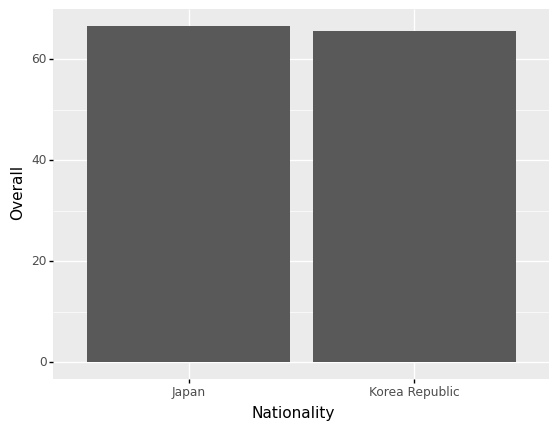

<ggplot: (8739000267705)>

In [360]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall'))

`-` 예시2: 한국과 일본의 평균능력치 비교 (색상변경) 

In [308]:
data = df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


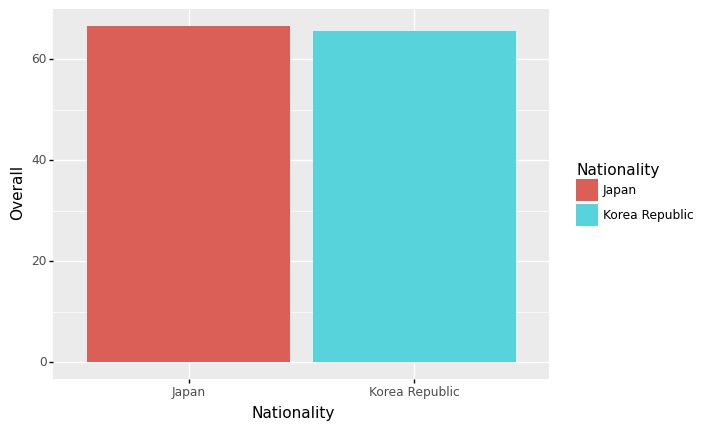

<ggplot: (8739005137813)>

In [311]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))
# ggplot(data)+geom_col(aes(x='Nationality',y='Overall',color='Nationality')) # 이건 우리가 원하는게 아님..

`-` 예시3: 한국과 일본의 평균연령 비교

In [312]:
data = df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data

,Nationality,Age
0,Japan,26.084507
1,Korea Republic,27.158192


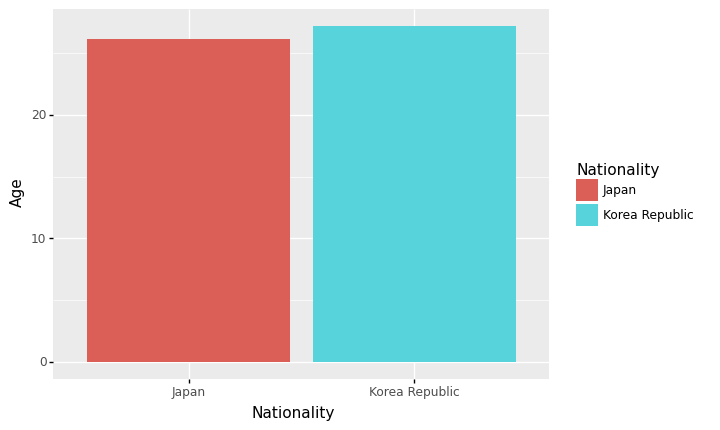

<ggplot: (8739004498769)>

In [315]:
ggplot(data)+geom_col(aes(x='Nationality',y='Age',fill='Nationality'))

### geom_col + position='dodge'

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교

In [361]:
data = df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean}).stack().reset_index().rename(columns={'level_1':'var',0:'val'})
data

,Nationality,var,val
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


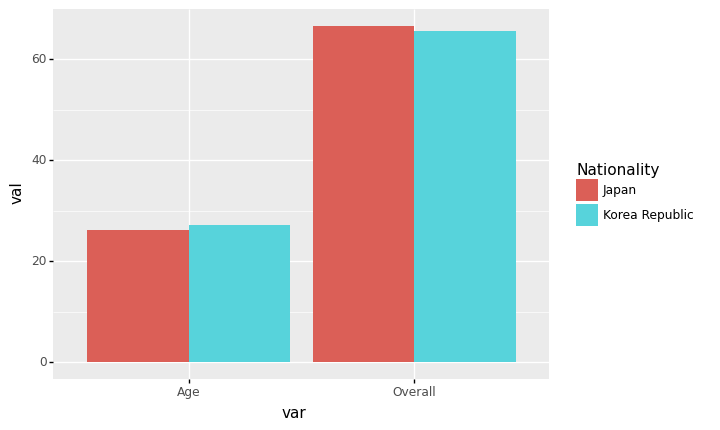

<ggplot: (8739000237493)>

In [362]:
ggplot(data)+geom_col(aes(x='var',y='val',fill='Nationality'),position='dodge') 
#ggplot(data)+geom_col(aes(x='var',y='val',fill='Nationality')) # 이건 우리가 원한게 아니야 

### geom_col + coord_flip()

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (90도회전)

In [326]:
data = df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean}).stack().reset_index().rename(columns={'level_1':'var',0:'val'})
data

,Nationality,var,val
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


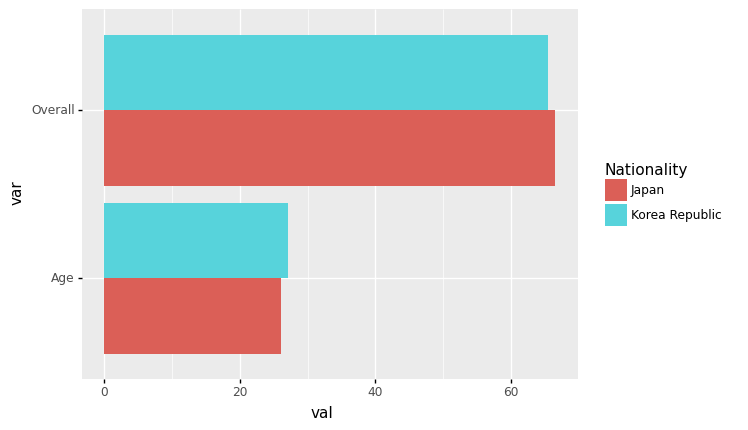

<ggplot: (8739003223205)>

In [329]:
ggplot(data)+geom_col(aes(x='var',y='val',fill='Nationality'),position='dodge')+coord_flip()
#ggplot(data)+geom_col(aes(x='val',y='var',fill='Nationality'),position='dodge') # 이것은 실패한 코드

### geom_col + facet_wrap(var)

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [332]:
data = df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean}).stack().reset_index().rename(columns={'level_1':'var',0:'val'})
data

,Nationality,var,val
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


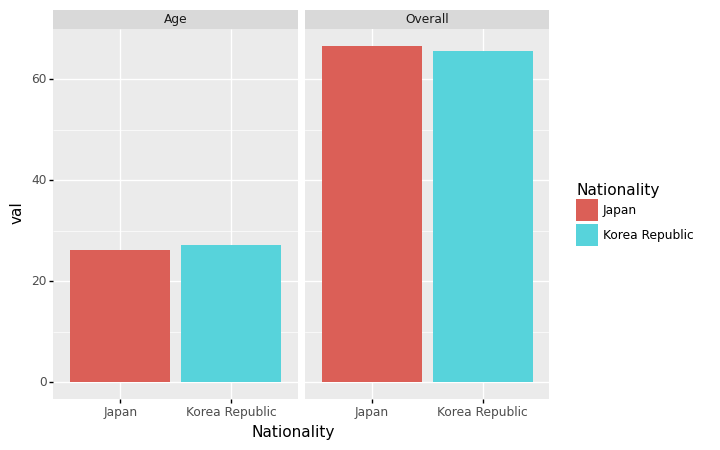

<ggplot: (8739000999017)>

In [336]:
ggplot(data)+geom_col(aes(x='Nationality',y='val',fill='Nationality'),position='dodge')+facet_wrap('var')
#ggplot(data)+geom_col(aes(x='val',y='var',fill='Nationality'),position='dodge') # 이것은 실패한 코드

`-` 예시2: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [332]:
data = df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean}).stack().reset_index().rename(columns={'level_1':'var',0:'val'})
data

,Nationality,var,val
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


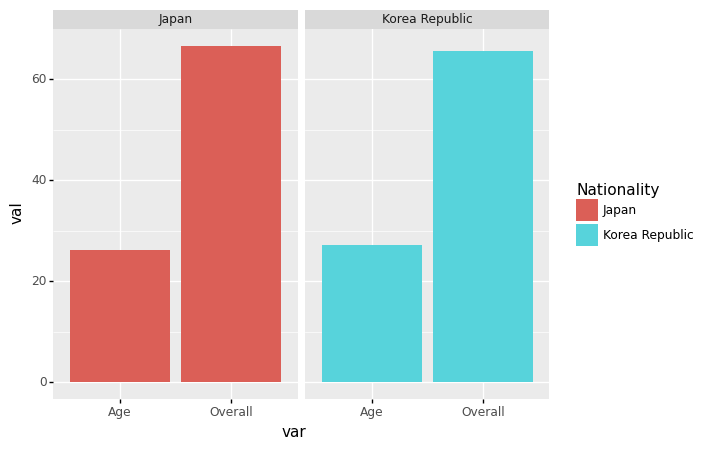

<ggplot: (8739000971277)>

In [337]:
ggplot(data)+geom_col(aes(x='var',y='val',fill='Nationality'),position='dodge')+facet_wrap('Nationality')
#ggplot(data)+geom_col(aes(x='val',y='var',fill='Nationality'),position='dodge') # 이것은 실패한 코드

### geom_col + facet_grid('var_y ~ var_x')

`-` 예시8: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [357]:
data = df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.melt(ignore_index=False).reset_index().rename(columns={'variable_0':'var','variable_1':'stat'})
data

,Nationality,var,stat,value
0,Japan,Overall,mean,66.478873
1,Korea Republic,Overall,mean,65.457627
2,Japan,Overall,amax,79.000000
3,Korea Republic,Overall,amax,89.000000
4,Japan,Age,mean,26.084507
5,Korea Republic,Age,mean,27.158192


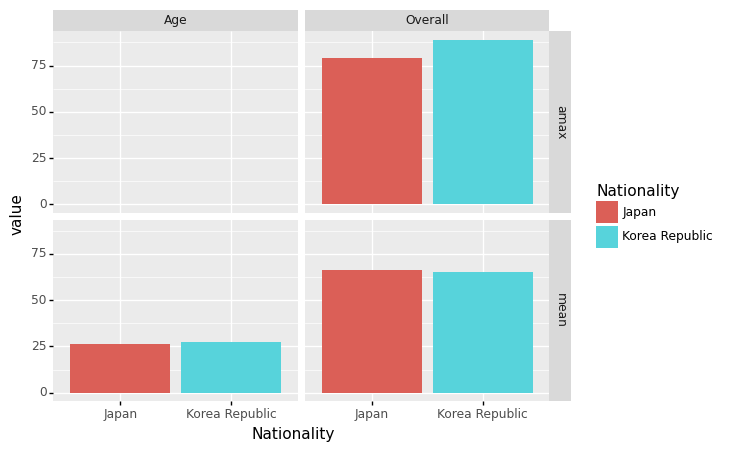

<ggplot: (8739000402017)>

In [358]:
ggplot(data)+geom_col(aes(x='Nationality',y='value',fill='Nationality'),position='dodge')+facet_grid('stat~var')
#ggplot(data)+geom_col(aes(x='val',y='var',fill='Nationality'),position='dodge') # 이것은 실패한 코드

### geom_bar vs geom_col

`-` 예시1: 한국과 일본의 단순 선수 숫자 비교 (with goem_col)

In [371]:
data=df.groupby('Nationality').agg({'Overall':'count'}).reset_index().rename(columns={'Overall':'count'})
data

,Nationality,count
0,Japan,284
1,Korea Republic,177


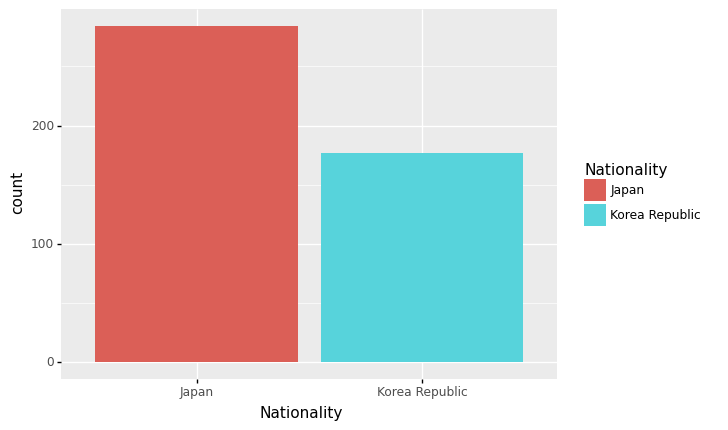

<ggplot: (8739000011773)>

In [372]:
ggplot(data)+geom_col(aes(x='Nationality',y='count',fill='Nationality'))

`-` 예시2: 한국과 일본의 단순 선수 숫자 비교 (with goem_bar)

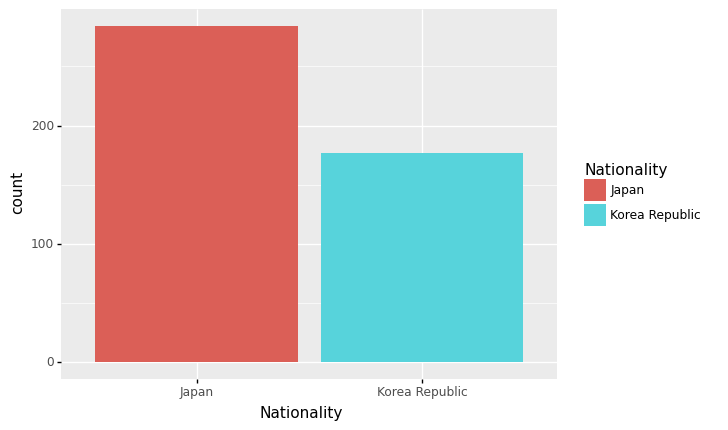

<ggplot: (8738999845041)>

In [383]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'))
#ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count')

- 편해보이는데.. 
- 사실 딱 이 경우에만 편함

### geom_bar()의 불편한점 

`-` 사실 편하라고 만든것 같은데, 그닥 편하지 않음. 
- 편하라고 만든 점1: groupby를 자동으로 해줘서 groupby를 못하는 유저들이 사용하기 편리하게 함 -> 그런데 우리는 groupby 잘함
- 편하라고 만든 점2: groupby이후 count연산을 알아서 해줌 -> 그런데 count연산만 알아서해주고 그 이외의 연산은 잘 지원안됨 

`-` 결론: groupby + count 조합에서만 편리하고 나머지는 편하지 않다. 

`-` 불편한 예시: 나라별 overall의 평균을 geom_bar()로 플랏해보라. 

In [379]:
data= df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


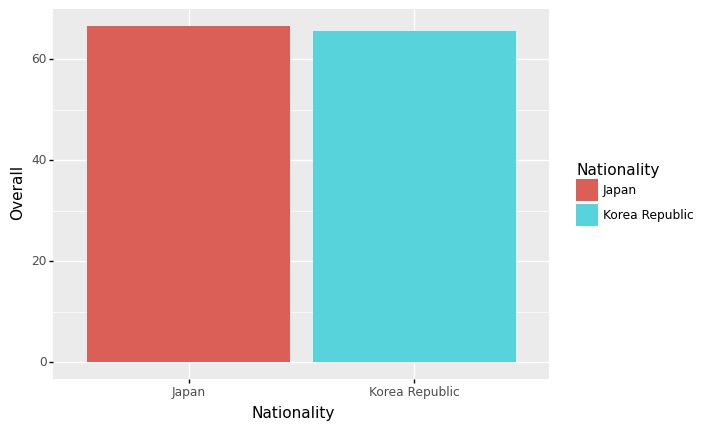

<ggplot: (8738999892805)>

In [381]:
ggplot(data)+geom_bar(aes(x='Nationality',y='Overall',fill='Nationality'),stat='identity')
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))

## 해들리위컴의 그래프레이어

`-` data + aes + geom + position + stat + coord + facet
- data: pandas dataframe 
- aes: x, y, color, fill, size, alpha, ...
- geom: point, col/bar, line/smooth, ... 
- position: jitter, dodge, ...
- stat: identity, count, ...
- coord: coord_flip()
- facet: facet_wrap(), facet_grid()

`-` 해들리위컴의 주장: ggplot2는 자료가 tidydata형태로 정리되어 있을경우 해들리위컴의 그래프레이어에 따라 시각화하는 최상의 툴이다.

`-` 내 생각
- 해들리위컴의 그래프레이어는 tabular data에 한정하여 맞는 개념임 (그런데 요즘은 안 그런 데이터도 있어) 
- tabular data라고 할지라도 ggplot2의 보다 좀 더 좋은 시각화 툴이 개발되었다고 생각 (plotly 등) 

## 심슨의 역설

`-` 버클리대학교의 입학데이터
- https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf

`-` 주장: 버클리대학에 gender bias가 존재한다. 
- 1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬 많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다. 

In [654]:
df=pd.read_csv("Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename(columns={'level_0':'department','level_1':'pass_or_fail','level_2':'gender',0:'count'})
df

,department,pass_or_fail,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


### 시각화1: 전체합격률

`-` groupby(성별)

In [655]:
df.groupby(['gender','pass_or_fail']).agg({'count':np.sum}).reset_index()

,gender,pass_or_fail,count
0,female,fail,1063
1,female,pass,772
2,male,fail,1291
3,male,pass,1400


In [657]:
df.groupby(['gender']).agg({'count':np.sum}).reset_index().rename({'count':'all'},axis=1)

,gender,all
0,female,1835
1,male,2691


`-` 두개의 데이터프레임을 합쳐야 한다. 

In [660]:
df.groupby(['gender','pass_or_fail']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby(['gender']).agg({'count':np.sum}).reset_index().rename({'count':'all'},axis=1))

,gender,pass_or_fail,count,all
0,female,fail,1063,1835
1,female,pass,772,1835
2,male,fail,1291,2691
3,male,pass,1400,2691


`-` 비율계산

In [663]:
data1= df.groupby(['gender','pass_or_fail']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby(['gender']).agg({'count':np.sum}).reset_index().rename({'count':'all'},axis=1))\
.assign(pass_rate = lambda df: (df['count']/df['all']).round(2))
data1

,gender,pass_or_fail,count,all,pass_rate
0,female,fail,1063,1835,0.58
1,female,pass,772,1835,0.42
2,male,fail,1291,2691,0.48
3,male,pass,1400,2691,0.52


`-` 시각화

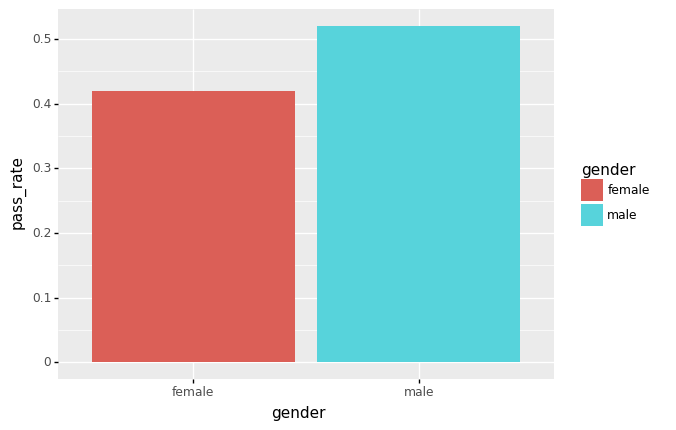

<ggplot: (8739010613753)>

In [664]:
ggplot(data1.query('pass_or_fail == "pass"'))+geom_col(aes(x='gender',y='pass_rate',fill='gender'))

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2: 학과별 합격률

`-` 학과별 합격률 

In [668]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename(columns={'count':'all'})

,department,gender,all
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


In [669]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename(columns={'count':'all'})\
.merge(df)

,department,gender,all,pass_or_fail,count
0,A,female,108,fail,19
1,A,female,108,pass,89
2,A,male,825,fail,314
3,A,male,825,pass,511
4,B,female,25,fail,7
5,B,female,25,pass,18
6,B,male,560,fail,208
7,B,male,560,pass,352
8,C,female,593,fail,391
9,C,female,593,pass,202


In [671]:
data2= df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename(columns={'count':'all'})\
.merge(df)\
.eval('pass_rate = count/all')
data2 

,department,gender,all,pass_or_fail,count,pass_rate
0,A,female,108,fail,19,0.175926
1,A,female,108,pass,89,0.824074
2,A,male,825,fail,314,0.380606
3,A,male,825,pass,511,0.619394
4,B,female,25,fail,7,0.280000
5,B,female,25,pass,18,0.720000
6,B,male,560,fail,208,0.371429
7,B,male,560,pass,352,0.628571
8,C,female,593,fail,391,0.659359
9,C,female,593,pass,202,0.340641


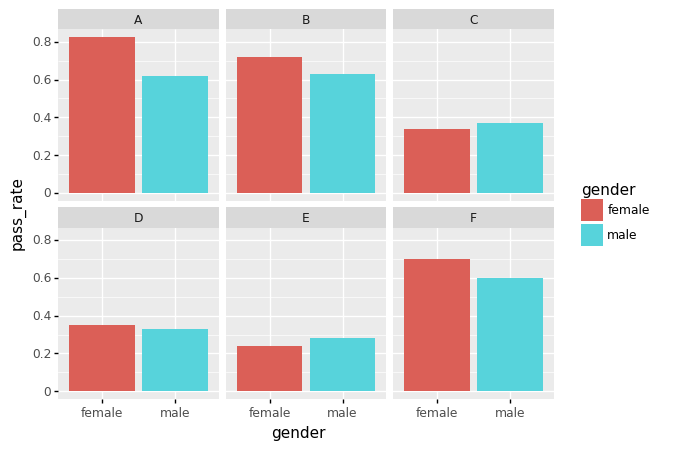

<ggplot: (8739012901233)>

In [674]:
ggplot(data2.query('pass_or_fail == "pass"'))+geom_col(aes(x='gender',y='pass_rate',fill='gender'))+facet_wrap('department')